In [1]:
import pandas as pd
import seaborn as sb
sb.set_theme()
import re
import nltk

from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joeylim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/joeylim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/joeylim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
reviews = pd.read_parquet("datasets/reviews_with_business_and_users.pqt") 
reviews.head()

,user_id,business_id,cool,date,funny,review_id,stars,text,useful,business_address,...,user_compliment_writer,user_cool,user_elite,user_fans,user_friends,user_funny,user_name,user_review_count,user_useful,user_yelping_since
0,-3-GR6zLPQUQXC02xE5QaA,Kfaq9cuyeXHkzWwL39jUWw,0,2022-01-08,0,5teG7qQ0oxQNRhXTkTV-AA,5.0,"If you leave hungry, it's your own fault. Ther...",0,311 Salem Pl,...,0,5,,0,"vm2DaLbzM9KxVjDU6gmMRQ, H5fheR7XkbgdOhUD2KijTw...",3,Tracey,41,14,2016-01-25 22:20:02
1,-5Qgwxo8lTJQdadtJY879w,9CRWWbw3iOo4-9FMAO6nKw,0,2021-12-31,0,yhJplqlngFVTFk5W_velmQ,5.0,They where able to provide very good sandwiche...,0,1302 Magazine St,...,0,0,,0,None,0,Mike,4,1,2020-10-28 01:46:43
2,-5Qgwxo8lTJQdadtJY879w,SJIQFKTW6uUsOo29w9IHxw,0,2021-12-31,0,Q90M8AHlNxUVL0ii7MAj1w,5.0,Was able to have very tasty po boy alligator a...,0,411 Bourbon St,...,0,0,,0,None,0,Mike,4,1,2020-10-28 01:46:43
3,-6J6EFoigdncrbw586jAQg,gP_oWJykA2RocIs_GurKWQ,0,2021-11-20,0,FkuvWGHoqveIKmG2JjuEXg,5.0,"While shopping in the area, we decided to try ...",0,"2000 Mallory Ln, Ste 615",...,0,0,,0,"7SwgKCa2IYP2tmxxDpuwaw, vwRUqCoINjuBdozwgvVCxA...",0,Paige,1,0,2021-11-20 18:40:41
4,-9q7GFmibqq3E6W0Bw3_jQ,gJSNa1bxwtY0dm1t-dh38w,0,2022-01-13,0,P7zB0L55i7zwFt3vjAa8lw,1.0,Food was horrible. Hot and sour soup had no fl...,0,219 Westshore Plz,...,0,0,,0,"BtUw263un2hRPQ7OvEF-8g, gh7JzS4v_xiTGUOG2kjLkQ...",0,Diana,2,5,2011-01-21 21:14:45


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99967 entries, 0 to 99966
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  99967 non-null  object 
 1   business_id              99967 non-null  object 
 2   cool                     99967 non-null  int64  
 3   date                     99967 non-null  object 
 4   funny                    99967 non-null  int64  
 5   review_id                99967 non-null  object 
 6   stars                    99967 non-null  float64
 7   text                     99967 non-null  object 
 8   useful                   99967 non-null  int64  
 9   business_address         99967 non-null  object 
 10  business_attributes      95264 non-null  object 
 11  business_categories      99943 non-null  object 
 12  business_city            99967 non-null  object 
 13  business_hours           94880 non-null  object 
 14  business_is_open      

In [5]:
businesses_df = pd.read_json("datasets/yelp_academic_dataset_business.json", lines=True)
businesses_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


### Distribution of Business Ratings

[Text(0, 0, '1986'),
 Text(0, 0, '4932'),
 Text(0, 0, '9527'),
 Text(0, 0, '14316'),
 Text(0, 0, '18453'),
 Text(0, 0, '26519'),
 Text(0, 0, '31125'),
 Text(0, 0, '27181'),
 Text(0, 0, '16307')]

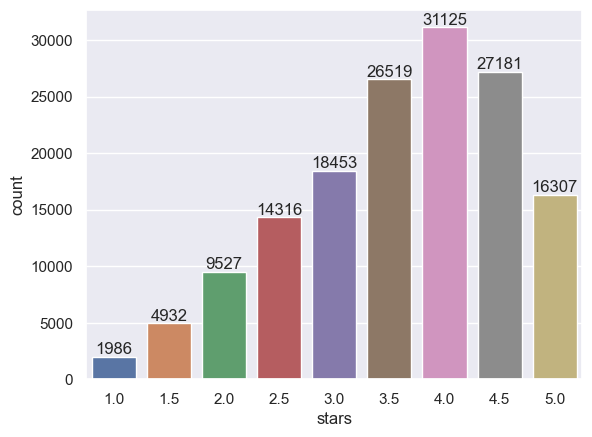

In [6]:
ax = sb.countplot(data=businesses_df, x="stars")
ax.bar_label(ax.containers[0])

In [7]:
businesses_five_stars = businesses_df.query("stars == 5.0")
businesses_five_stars.shape

(16307, 14)

In [8]:
businesses_five_stars.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10,1,{'ByAppointmentOnly': 'True'},"General Dentistry, Dentists, Health & Medical,...","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:3..."
25,PSo_C1Sfa13JHjzVNW6ziQ,Indian Walk Veterinary Center,662 Durham Rd,Newtown,PA,18940,40.273493,-74.987496,5.0,15,1,None,"Pet Services, Pet Groomers, Pets, Veterinarians","{'Monday': '8:0-19:0', 'Tuesday': '8:0-19:0', ..."
30,fvWn8oXXwbj2l79cochZyw,Altitude Trampoline Park - Boise,1301 N Milwaukee St,Boise,ID,83704,43.616763,-116.285382,5.0,30,1,"{'BusinessParking': '{'garage': False, 'street...","Trampoline Parks, Active Life","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'..."
39,fSCNwMtNNQY9QT69Cj9fiA,Sierra Pro Events,,Sparks,NV,89431,39.540154,-119.748395,5.0,7,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Musicians, DJs, Karaoke, Event Planning & Serv...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."


In [9]:
categories = businesses_five_stars["categories"]
cats = []
for ele in categories:
    split = str(ele).split(",")
    for sp in split:
        if sp not in cats:
            cats.append(sp)
print(len(cats))

1992


In [10]:
for cat in cats:
    print(cat)

Doctors
 Traditional Chinese Medicine
 Naturopathic/Holistic
 Acupuncture
 Health & Medical
 Nutritionists
General Dentistry
 Dentists
 Cosmetic Dentists
Pet Services
 Pet Groomers
 Pets
 Veterinarians
Trampoline Parks
 Active Life
Musicians
 DJs
 Karaoke
 Event Planning & Services
 Nightlife
DUI Law
 Professional Services
 Lawyers
 Criminal Defense Law
Shipping Centers
 Local Services
Restaurants
 Italian
Real Estate Agents
 Home Services
 Real Estate
Coffee & Tea
 Cafes
 Restaurants
 Pet Adoption
 Food
Local Services
 Appliances & Repair
Food Trucks
Fashion
 Shopping
 Men's Clothing
 Food Trucks
Real Estate
 Financial Services
 Mortgage Brokers
 Mortgage Lenders
Fitness & Instruction
 Physical Therapy
 Trainers
Parenting Classes
 Maternity Wear
 Fashion
 Education
 Specialty Schools
 Laundry Services
 Child Care & Day Care
 Baby Gear & Furniture
Home Services
 Glass & Mirrors
 Door Sales/Installation
 Real Estate Agents
Shopping
 Books
 Mags
 Music & Video
 Toy Stores
 Hobby Shops
 C

### Yelp dataset has other businessses besides food establishments, so we will filter by Restaurants

In [11]:
businesses_five_stars = businesses_df[businesses_df['categories'].str.contains(r'\bRestaurants\b', na=False)]
businesses_five_stars.shape

(52268, 14)

### Get business ids of 5 star restaurants

In [12]:
business_id_five_stars = businesses_five_stars["business_id"]

### Get reviews of restaurants that have 5 stars

In [13]:
reviews_of_five_star_businesses = reviews[reviews["business_id"].isin(business_id_five_stars.values)]

In [14]:
reviews_of_five_star_businesses.shape

(66254, 43)

In [15]:
reviews_text = reviews_of_five_star_businesses["text"]
reviews_text.head()

0    If you leave hungry, it's your own fault. Ther...
1    They where able to provide very good sandwiche...
2    Was able to have very tasty po boy alligator a...
3    While shopping in the area, we decided to try ...
4    Food was horrible. Hot and sour soup had no fl...
Name: text, dtype: object

### Get rid of stopwords and punctuation and convert everything to lowercase

In [16]:
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stop_words])
    
    return review

In [17]:
reviews_text = reviews_text.apply(clean)
reviews_text = reviews_text.to_frame()

In [18]:
reviews_text.head()

,text
0,leave hungry fault 8 us left happy leftovers good
1,able provide good sandwiches paninis burgers g...
2,able tasty po boy alligator fish service bar f...
3,shopping area decided try yats something diffe...
4,food horrible hot sour soup flavor egg rolls s...


### Lemmatize the words
We want to group words like "eat" "eaten" and "eating" into their base form so that they count as the same word instead of separate words

In [19]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return " ".join(lemmatized_tokens)

In [20]:
reviews_text["text"].apply(lemmatize_text)

0          leave hungry fault 8 u left happy leftover good
1        able provide good sandwich panini burger group...
2        able tasty po boy alligator fish service bar f...
3        shopping area decided try yats something diffe...
4        food horrible hot sour soup flavor egg roll so...
                               ...                        
99962    sadie colton amazing colton greeted u sat u so...
99963    hub heard constant advertisement kmox radio sa...
99964    love place super close house everyone bartende...
99965    location never opened website say store open 1...
99966    croissant dont french toast hash brown wildwha...
Name: text, Length: 66254, dtype: object

### Term Frequency Analysis
We want to know what people who patronise these 5 star restaurants say about the restaurant so that we can know what makes a restaurant good

In [21]:
def count_freq(text):
    tokens = word_tokenize(text)
    return Counter(tokens)


In [22]:
reviews_text['word_frequency'] = reviews_text['text'].apply(count_freq)

In [23]:
total_word_frequency = Counter()
for counter in reviews_text['word_frequency']:
    total_word_frequency.update(counter)
print(total_word_frequency)

Counter({'food': 44915, 'good': 32037, 'great': 27562, 'place': 26153, 'service': 20971, 'time': 18611, 'like': 17427, 'back': 17231, 'one': 16330, 'order': 16009, 'get': 15563, 'ordered': 15486, 'would': 14885, 'go': 14055, 'got': 13996, 'also': 13721, 'delicious': 13691, 'chicken': 13120, 'restaurant': 12934, 'us': 12917, 'really': 12711, 'best': 11094, 'well': 10515, 'came': 10448, 'staff': 10255, 'menu': 10100, 'definitely': 10052, 'nice': 9929, 'amazing': 9836, 'try': 9671, 'even': 9496, 'dont': 9243, 'always': 9112, 'love': 8966, 'ive': 8933, 'im': 8634, 'didnt': 8627, '-': 8379, 'friendly': 8330, 'recommend': 8195, 'pizza': 8023, 'first': 7860, 'come': 7777, 'never': 7766, 'experience': 7744, 'wait': 7587, 'sauce': 7567, 'little': 7445, 'made': 7340, 'cheese': 7213, 'could': 7188, 'fresh': 7148, 'went': 7011, 'everything': 6998, 'table': 6644, 'much': 6511, 'meal': 6500, 'eat': 6473, 'said': 6460, 'bar': 6406, 'drinks': 6395, 'server': 6348, 'make': 6200, 'new': 6176, 'people': 

### Generate wordcloud for qualitative analysis
Although the wordcloud will not give us a quantitative measure, it can still be used as a visual guide to see the frequent words

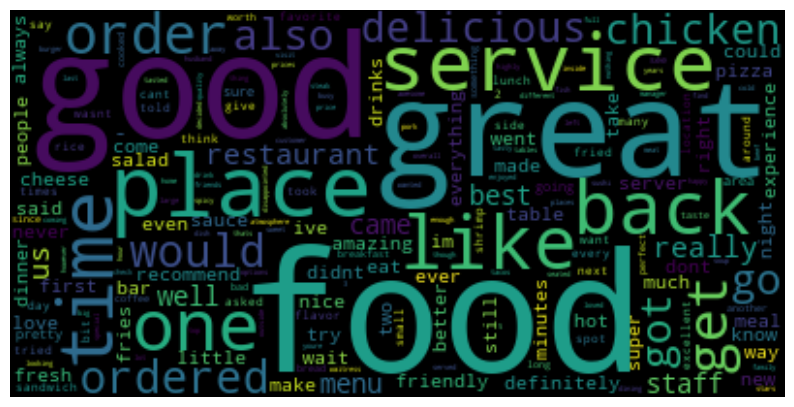

In [24]:
wordcloud = WordCloud().generate_from_frequencies(total_word_frequency)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()